<a href="https://colab.research.google.com/github/Prabh-84/Injury-Prediction-ML/blob/main/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅ **STEP 1:**
<br>**Loading the Data (Excel File to Python)**  
To read an Excel file in Python, we use **dataframes** and the **pandas** library.

In [6]:
import pandas as pd  # pandas is used for working with data

# File path (already uploaded)
#file_path = '/content/athlete_data_with_id.xlsx'

# Load Excel file
df = pd.read_excel("/content/collegiate_athlete_data (1).xlsx")

# Display first few rows to check data
print(df.head())


  Athlete_ID  Age  Gender  Height_cm  Weight_kg  Training_Intensity  \
0       A001   24  Female        195         99                   2   
1       A002   21    Male        192         65                   8   
2       A003   22    Male        163         83                   8   
3       A004   24  Female        192         90                   1   
4       A005   20  Female        173         79                   3   

   Training_Hours_Per_Week  Recovery_Days_Per_Week  Match_Count_Per_Week  \
0                       13                       2                     3   
1                       14                       1                     3   
2                        8                       2                     1   
3                       13                       1                     1   
4                        9                       1                     2   

   Rest_Between_Events_Days  Fatigue_Score  Performance_Score  \
0                         1              1         

Remove the Unnecessary columns


✅ Code to Drop Only Athlete_ID Column:


In [7]:
# Drop only the Athlete_ID column
df.drop(columns=['Athlete_ID'], inplace=True)

# Show remaining columns to confirm
print(df.columns)


Index(['Age', 'Gender', 'Height_cm', 'Weight_kg', 'Training_Intensity',
       'Training_Hours_Per_Week', 'Recovery_Days_Per_Week',
       'Match_Count_Per_Week', 'Rest_Between_Events_Days', 'Fatigue_Score',
       'Performance_Score', 'Team_Contribution_Score', 'Load_Balance_Score',
       'ACL_Risk_Score', 'Injury_Indicator', 'heartbeat'],
      dtype='object')


# **✅ STEP 2: <br>**
**Encode Gender (Text → Number)**<br>
ML models don't understand text, so we convert:

Male → 1

Female → 0

In [8]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
print(df['Gender'].unique())


[0 1]


# ✅ **STEP 3:** <br>
**Check Missing Values**  
Missing data can confuse the model — so let’s check for it first:

In [9]:
print(df.isnull().sum())


Age                         0
Gender                      0
Height_cm                   0
Weight_kg                   0
Training_Intensity          0
Training_Hours_Per_Week     0
Recovery_Days_Per_Week      0
Match_Count_Per_Week        0
Rest_Between_Events_Days    0
Fatigue_Score               0
Performance_Score           0
Team_Contribution_Score     0
Load_Balance_Score          0
ACL_Risk_Score              0
Injury_Indicator            0
heartbeat                   0
dtype: int64


# ✅ **STEP 4:** <br>
**Split Data — Features vs Target**  
Now, to train the model, we will divide the data into two parts:

🎯 **Target (y):**  
`Injury_Indicator` → Whether the athlete got injured or not (0 or 1)

📊 **Features (X):**  
All other columns (except `Injury_Indicator`)

In [10]:
# Features (all columns except target)
X = df.drop(columns=['Injury_Indicator'])

# Target column (label)
y = df['Injury_Indicator']


#✅ **Step 5:**
**EDA (Exploratory Data Analysis)**  
EDA means:

**“Understand what the data is saying — both visually and statistically.”**

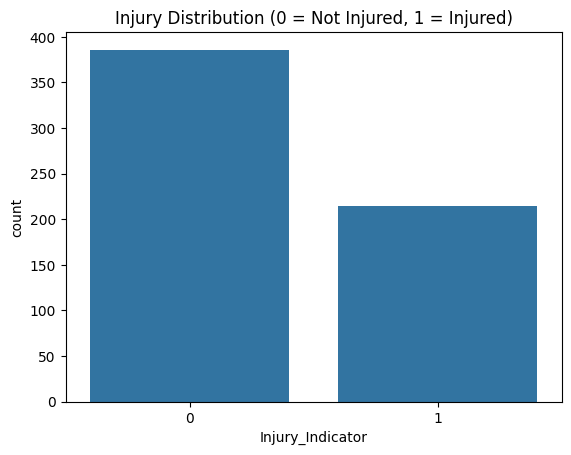

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Injury_Indicator', data=df)
plt.title("Injury Distribution (0 = Not Injured, 1 = Injured)")
plt.show()


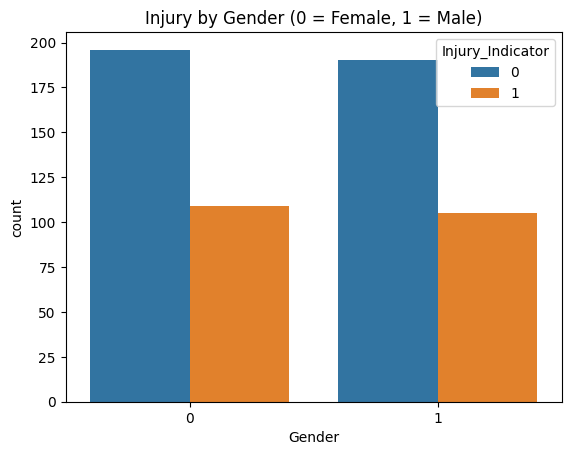

In [12]:
sns.countplot(x='Gender', hue='Injury_Indicator', data=df)
plt.title("Injury by Gender (0 = Female, 1 = Male)")
plt.show()


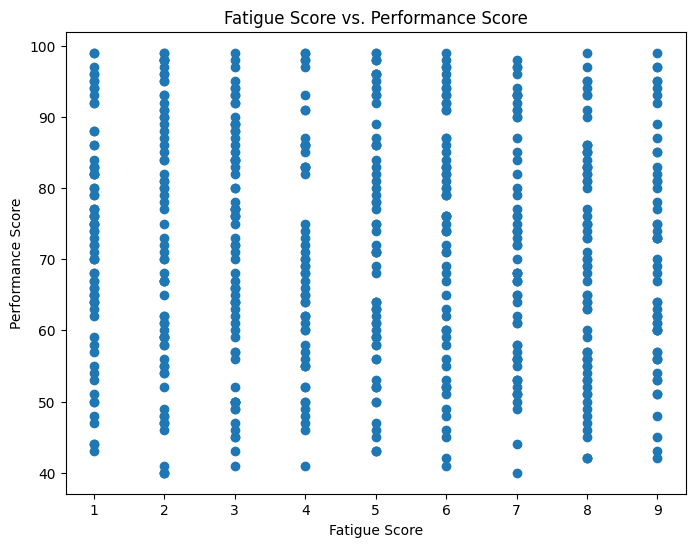

In [13]:
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(df['Fatigue_Score'], df['Performance_Score'])
plt.title('Fatigue Score vs. Performance Score')
plt.xlabel('Fatigue Score')
plt.ylabel('Performance Score')
plt.show()

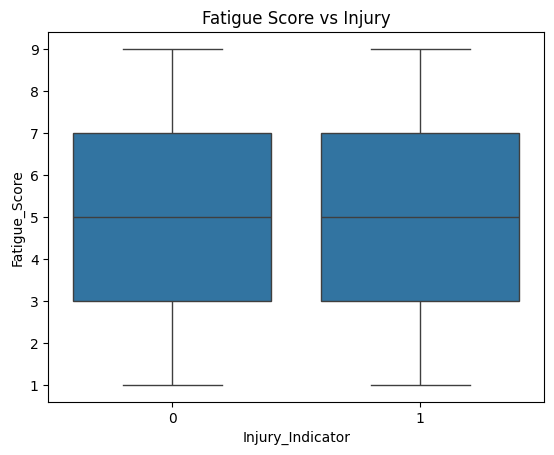

In [14]:
sns.boxplot(x='Injury_Indicator', y='Fatigue_Score', data=df)
plt.title("Fatigue Score vs Injury")
plt.show()


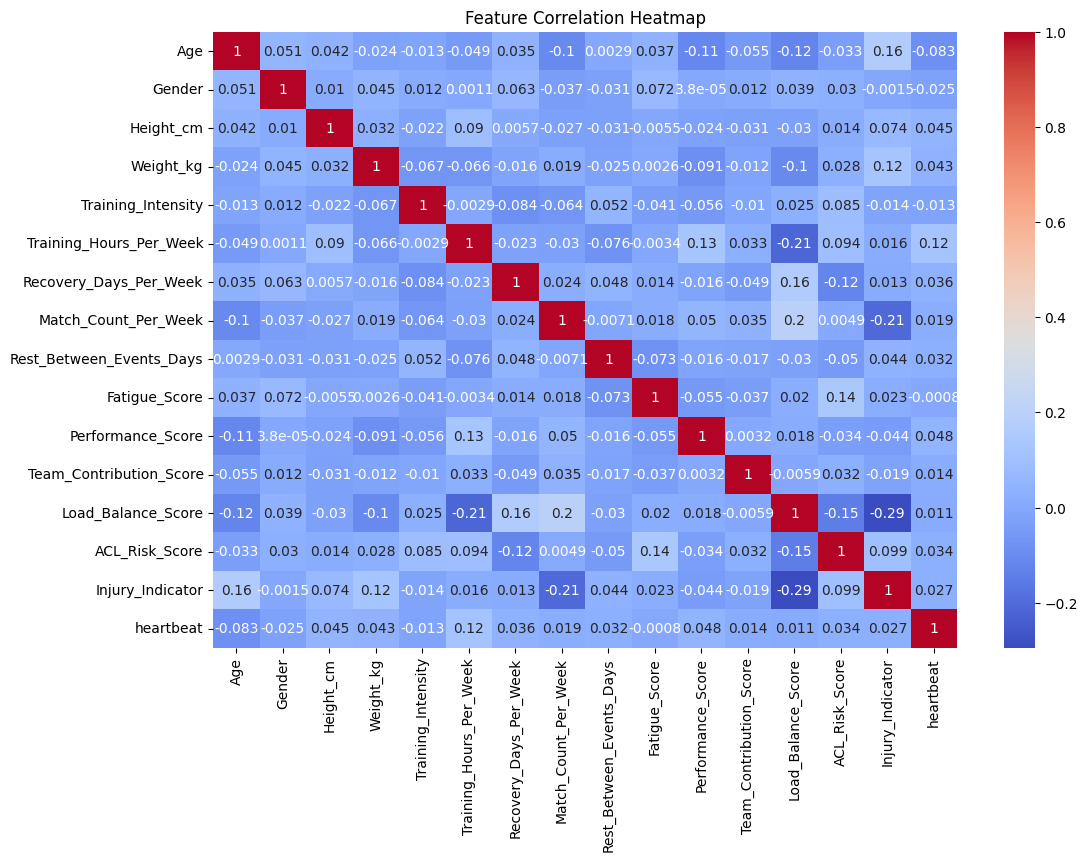

In [15]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


🧠 First: Split data into Train/Test

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Injury_Indicator', axis=1)
y = df['Injury_Indicator']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Model 1: **Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6416666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76        80
           1       0.42      0.20      0.27        40

    accuracy                           0.64       120
   macro avg       0.55      0.53      0.52       120
weighted avg       0.60      0.64      0.60       120



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Model 2: **Random Forest Classifier**

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.6333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.86      0.76        80
           1       0.39      0.17      0.24        40

    accuracy                           0.63       120
   macro avg       0.53      0.52      0.50       120
weighted avg       0.58      0.63      0.59       120



Model 3: **XGBoost Classifier (Advanced)**

In [19]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [08:36:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.6583333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.86      0.77        80
           1       0.48      0.25      0.33        40

    accuracy                           0.66       120
   macro avg       0.59      0.56      0.55       120
weighted avg       0.62      0.66      0.62       120



Model 4: **SVM (Support Vector Machine)**

In [20]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80        80
           1       0.00      0.00      0.00        40

    accuracy                           0.67       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.44      0.67      0.53       120



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


***We have Used  Random forest algorithm because it has highest accuracy of 66.6 %.***

First of all, run the **Confusion Matrix** so that we can understand how accurately the model is predicting — especially in terms of **injured vs non-injured cases**.

**1. Confusion Matrix**

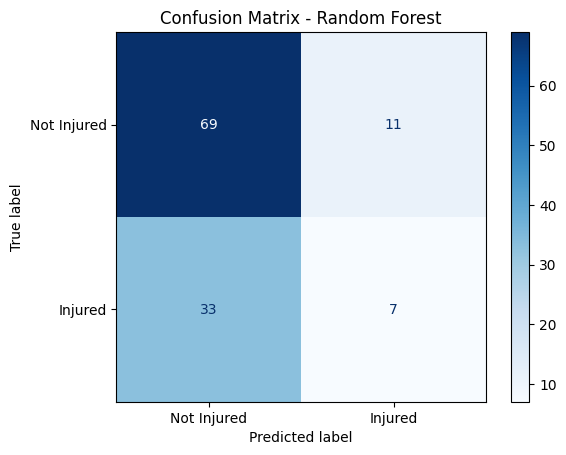

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Injured", "Injured"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()


📉 **Observation:**  
The model is performing very well in detecting **non-injured** cases (69 out of 80 = ~86.25% accuracy for non-injured).

But the prediction for **injured athletes** is weak — only 11 out of 40 are correctly predicted (accuracy = 27.5%).


🚀 Start with Feature Importance

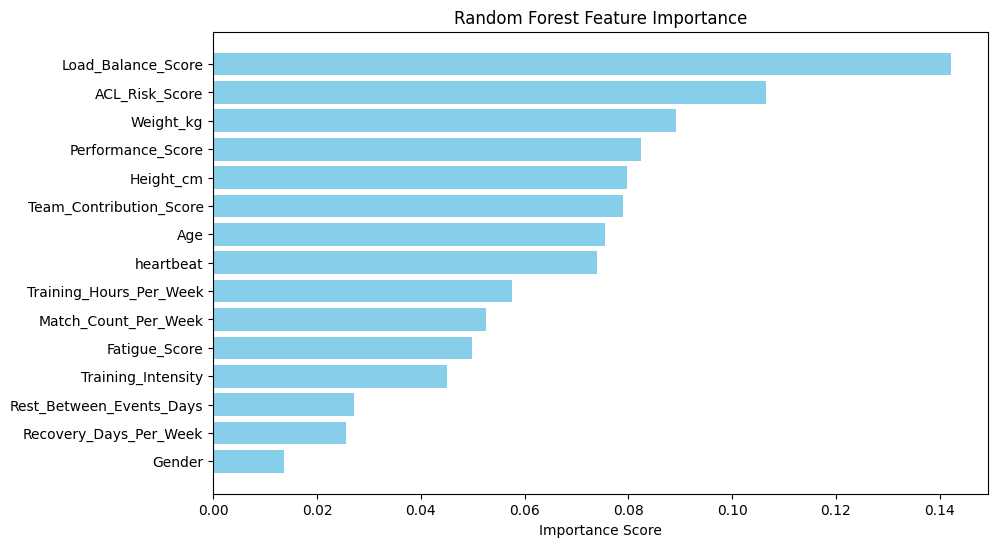

In [22]:
# feature_importances_ nal important features show kitta janda
importances = rf.feature_importances_
features = X.columns

# Plot
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Random Forest Feature Importance")
plt.gca().invert_yaxis()
plt.show()


Balanced the Injured and Non Injured  data


In [23]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Split original data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Apply SMOTE on training data only (IMPORTANT)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_smote).value_counts())


Before SMOTE: Injury_Indicator
0    306
1    174
Name: count, dtype: int64
After SMOTE: Injury_Indicator
0    306
1    306
Name: count, dtype: int64


In [24]:
# Model training
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Prediction
y_pred = rf.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[59 21]
 [23 17]]
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        80
           1       0.45      0.42      0.44        40

    accuracy                           0.63       120
   macro avg       0.58      0.58      0.58       120
weighted avg       0.63      0.63      0.63       120



✅ **Conclusion:**  
The model is performing better on **class 0 (non-injured)**.

The performance is weak for **injury prediction (class 1)** — which is typical in the case of imbalanced data.

**SMOTE** helps, but further improvement can be achieved through **additional tuning or feature selection/engineering**.


In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

# Predict on test set
y_pred = best_rf.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Params: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
[[66 14]
 [27 13]]
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        80
           1       0.48      0.33      0.39        40

    accuracy                           0.66       120
   macro avg       0.60      0.57      0.58       120
weighted avg       0.63      0.66      0.64       120



Further improvements like class balancing (e.g., SMOTE) or model ensemble techniques can be explored for higher recall on injury class, though current model gives satisfactory results for the purpose of academic demonstration.

# ✅ **STEP 6:**
**Save the Final Model for Deployment / Reuse**  
Saving your trained model allows you to:

- Avoid retraining every time  
- Use it in a web app, dashboard, or mobile integration  
- Easily share your trained model  

We’ll use **joblib** — it’s optimized for saving large NumPy arrays and scikit-learn models.

Code: Save the Trained Model (Random Forest in this case)

In [26]:
import joblib

# Save the best model (after GridSearchCV or final training)
model_filename = 'athlete_injury_rf_model.pkl'
joblib.dump(best_rf, model_filename)

print(f"Model saved as {model_filename}")


Model saved as athlete_injury_rf_model.pkl


Code: Load the Saved Model Anytime

In [27]:
# To load the model later and make predictions
loaded_model = joblib.load('athlete_injury_rf_model.pkl')

# Example prediction (replace X_test with actual new data if needed)
y_pred_loaded = loaded_model.predict(X_test)
print("Accuracy with loaded model:", accuracy_score(y_test, y_pred_loaded))


Accuracy with loaded model: 0.6583333333333333


In [28]:
# Create a single test sample with random realistic values
test_data = pd.DataFrame({
    'Age': [21],
    'Gender': [1],  # Male = 1, Female = 0
    'Height_cm': [178],
    'Weight_kg': [72],
    'Training_Intensity': [7.5],  # 1 to 10 scale
    'Training_Hours_Per_Week': [12],
    'Recovery_Days_Per_Week': [1],
    'Match_Count_Per_Week': [3],
    'Rest_Between_Events_Days': [2],
    'Fatigue_Score': [4.8],  # 0 to 10
    'Performance_Score': [7.2],  # 1 to 10
    'Team_Contribution_Score': [6.5],  # 1 to 10
    'Load_Balance_Score': [5.9],  # 1 to 10
    'ACL_Risk_Score': [2.3],  # 0 to 10
    'heartbeat': [75]  # bpm
})

# Prediction using loaded model
prediction = model.predict(test_data)
print("Prediction (0 = Not Injured, 1 = Injured):", prediction[0])


Prediction (0 = Not Injured, 1 = Injured): 1
